In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\M RAJESH\Desktop\Ekeeda DS\archive (2)\heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#printing null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#five point summary
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Visualization 

<AxesSubplot:>

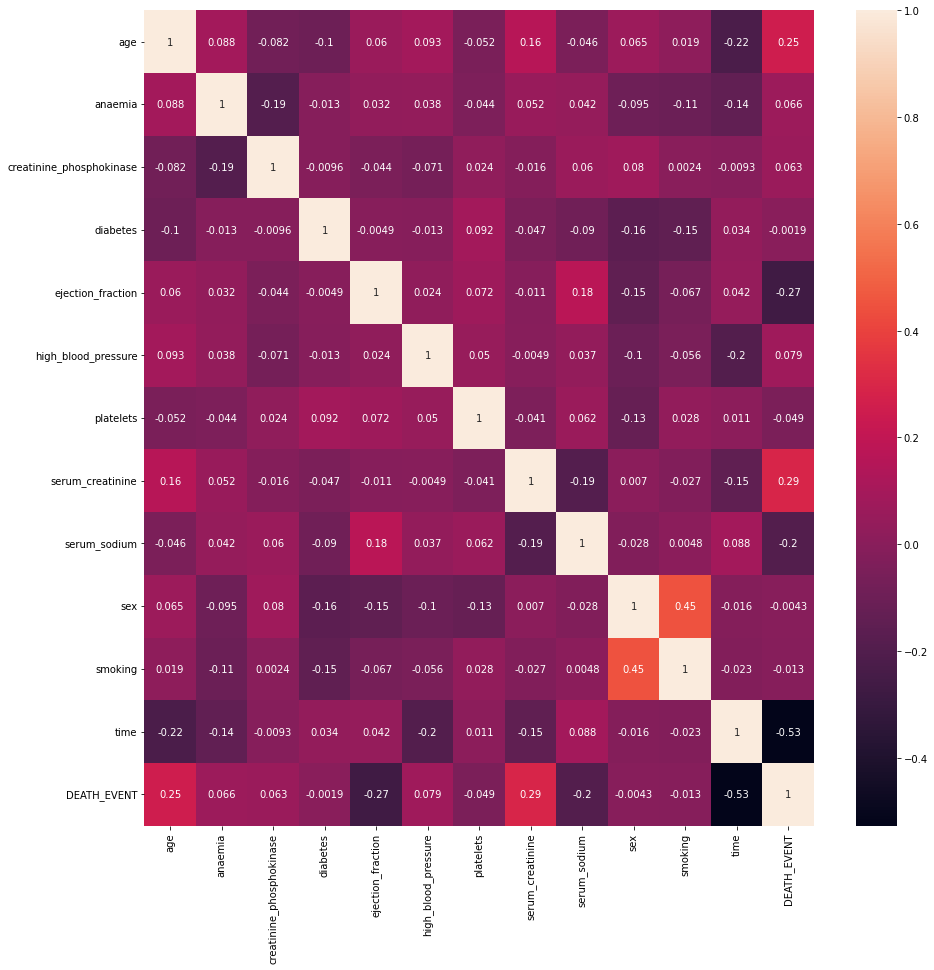

In [6]:
#visualizing the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0)

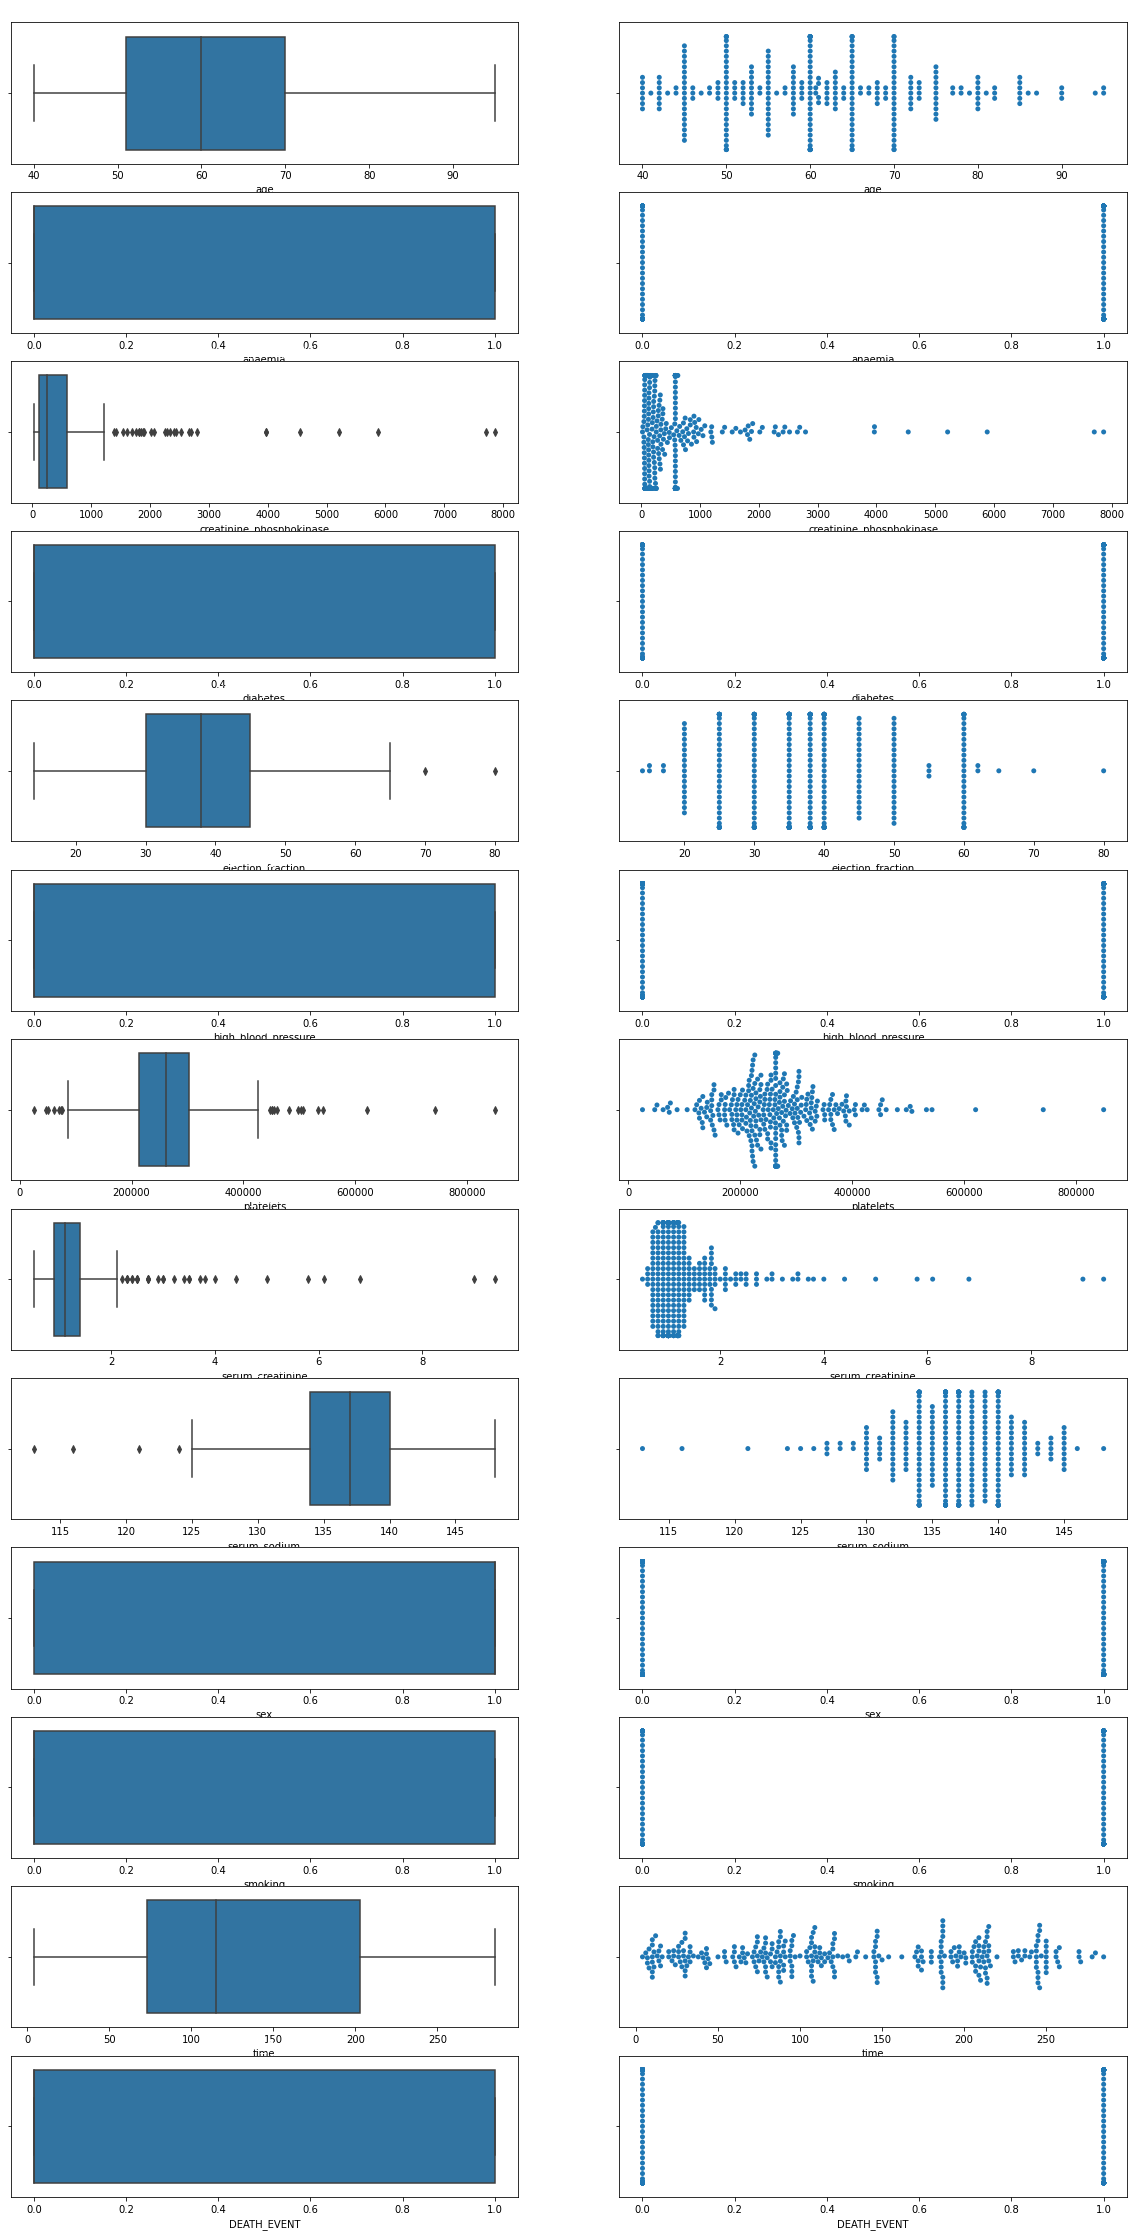

In [7]:
#along with boxplot plotting swarmplot to know no.of outlier points 
j=1
plt.figure(figsize=(20,40))
for i in df.columns:
    plt.subplot(len(df.columns),2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(len(df.columns),2,j)
    sns.swarmplot(df[i])
    j=j+1

In [8]:
# checking skewness of the data
df.skew()

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

In [9]:
# treating the skewness with boxcox method 
from scipy import stats
col_skew =["creatinine_phosphokinase","platelets","serum_creatinine","serum_sodium"]
l=[]
for i in col_skew:
    a=stats.boxcox(df[i])[0]
    l.append(np.array([a]))
X=pd.DataFrame(np.concatenate(l)) # (OR) X=pd.DataFrame(list(map(np.ravel, l)))


In [10]:
X=X.T
X.columns=col_skew
X

,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium
0,4.011877,935.540540,0.475058,7.639653e+13
1,4.790978,932.683294,0.090952,1.046115e+14
2,3.447415,734.259071,0.231062,7.239550e+13
3,3.320114,834.330337,0.475058,1.100888e+14
4,3.488730,1037.504702,0.632279,3.454225e+13
...,...,...,...,...
294,3.022089,718.460239,0.090952,1.483958e+14
295,4.392797,944.186147,0.166815,1.217839e+14
296,4.430194,1552.455897,-0.249708,1.158100e+14
297,4.476891,683.333908,0.286173,1.280198e+14


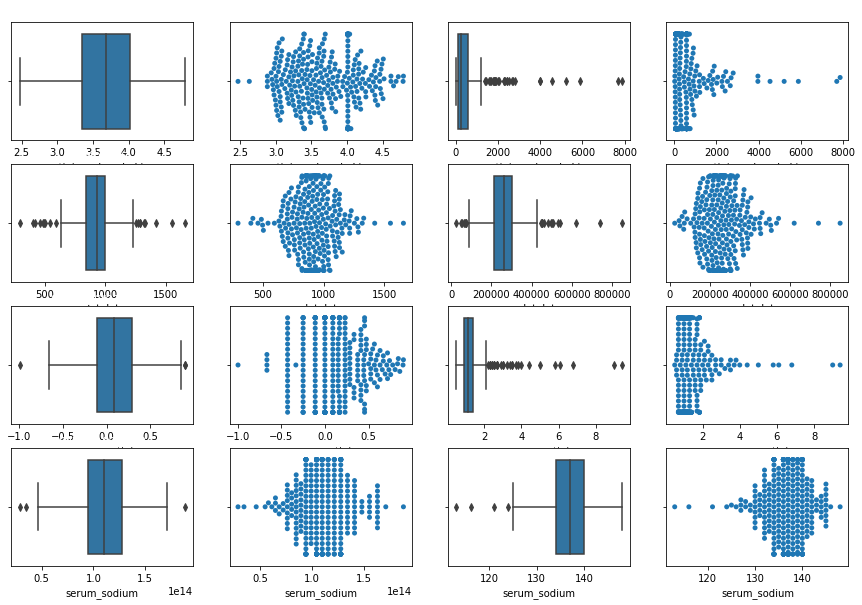

In [11]:
j=1
plt.figure(figsize=(15,10))
for i in X.columns:
    plt.subplot(len(X.columns),4,j)
    sns.boxplot(X[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(len(X.columns),4,j)
    sns.swarmplot(X[i])
    j=j+1
    plt.subplot(len(X.columns),4,j)
    sns.boxplot(df[i])
    j=j+1
    plt.subplot(len(X.columns),4,j)
    sns.swarmplot(df[i])
    j=j+1

In [12]:
q1 , q3 =df['ejection_fraction'].quantile([0.25,0.75])
iqr = q3-q1
lf , uf = q1-1.5*iqr , q3+1.5*iqr
df['ejection_fraction']=np.where(df['ejection_fraction']<lf,df['ejection_fraction'].mean(),df['ejection_fraction'])
df['ejection_fraction']=np.where(df['ejection_fraction']>uf,df['ejection_fraction'].mean(),df['ejection_fraction'])

<AxesSubplot:xlabel='ejection_fraction'>

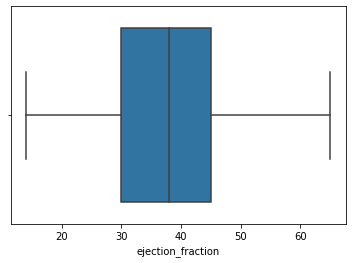

In [13]:
sns.boxplot(df['ejection_fraction'])

In [14]:
for i in X.columns:
    df[i]=X[i]
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,4.011877,0,20.0,1,935.540540,0.475058,7.639653e+13,1,0,4,1
1,55.0,0,4.790978,0,38.0,0,932.683294,0.090952,1.046115e+14,1,0,6,1
2,65.0,0,3.447415,0,20.0,0,734.259071,0.231062,7.239550e+13,1,1,7,1
3,50.0,1,3.320114,0,20.0,0,834.330337,0.475058,1.100888e+14,1,0,7,1
4,65.0,1,3.488730,1,20.0,0,1037.504702,0.632279,3.454225e+13,0,0,8,1


In [15]:
df.shape

(299, 13)

## separating independent and dependent features

In [16]:
x=df
y=df['DEATH_EVENT']

In [17]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

## Imbalance data treatment

In [18]:
# from imblearn.combine import SMOTEENN
# sme = SMOTEENN()
# x_res, y_res = sme.fit_resample(x, y) 

In [19]:
from imblearn.over_sampling import SMOTEN
sme = SMOTEN()
x_res, y_res = sme.fit_resample(x, y)

In [20]:
y_res.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

## Train test split

In [21]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,test_size=0.3,random_state=None) 

In [22]:
x_train.shape

(284, 13)

In [23]:
y_test.shape

(122,)

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

## ANN Model Building

In [25]:
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.layers import Dropout

In [26]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

In [27]:
ann=tf.keras.models.Sequential() #initialzing the ann

In [28]:
ann.add(tf.keras.layers.Dense(units=12,kernel_initializer='uniform',activation='PReLU')) #12 columns
ann.add(Dropout(0.2))      
#using dense we can specify how many hidden neurons are needed and drop out of 20% neurons
ann.add(tf.keras.layers.Dense(units=6,kernel_initializer='uniform',activation='PReLU'))
ann.add(Dropout(0.2))                                                                       
#using dense we can specify how many hidden neurons are needed and drop out of 20% neurons
#ann.add(tf.keras.layers.Dense(units=6,kernel_initializer='uniform',activation='PReLU'))
#ann.add(Dropout(0.7))
#using dense we can specify how many hidden neurons are needed and drop out of 70% neurons 

In [29]:
output=ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
#binary  classification
ann.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [30]:
model_training=ann.fit(x_train,y_train,validation_split=0.33,batch_size=10,callbacks=early_stopping,epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 21ms/step - loss: 0.6929 - accuracy: 0.5368 - val_loss: 0.6907 - val_accuracy: 0.8191
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.7474 - val_loss: 0.6842 - val_accuracy: 0.8830
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6788 - accuracy: 0.8211 - val_loss: 0.6692 - val_accuracy: 0.9468
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.9053 - val_loss: 0.6424 - val_accuracy: 0.9681
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6274 - accuracy: 0.9316 - val_loss: 0.6026 - val_accuracy: 0.9681
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.5822 - accuracy: 0.9684 - val_loss: 0.5464 - val_accuracy: 0.9681
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.5183 - accuracy: 0.9632 - val_loss: 0.4752 - val_accuracy: 0.9681
Epoch 8/100


In [31]:
y_pred=ann.predict(x_test) 
y_pred=(y_pred>0.5) 

4/4 [==============================] - 0s 3ms/step


In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 

In [33]:
accuracy_score(y_pred,y_test) 

1.0

In [34]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        68

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



In [35]:
confusion_matrix(y_pred,y_test)


array([[54,  0],
       [ 0, 68]], dtype=int64)

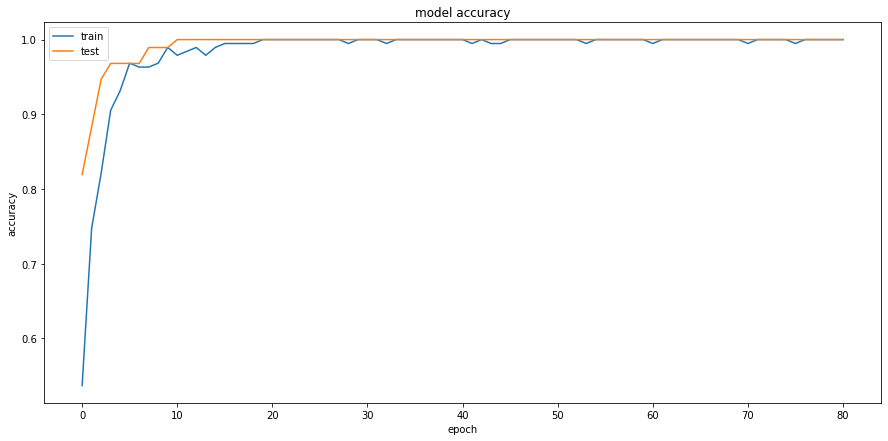

In [41]:
# summmary history for accuracy 
plt.figure(figsize=(15,7)) 
plt.plot(model_training.history['accuracy']) 
plt.plot(model_training.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show() 

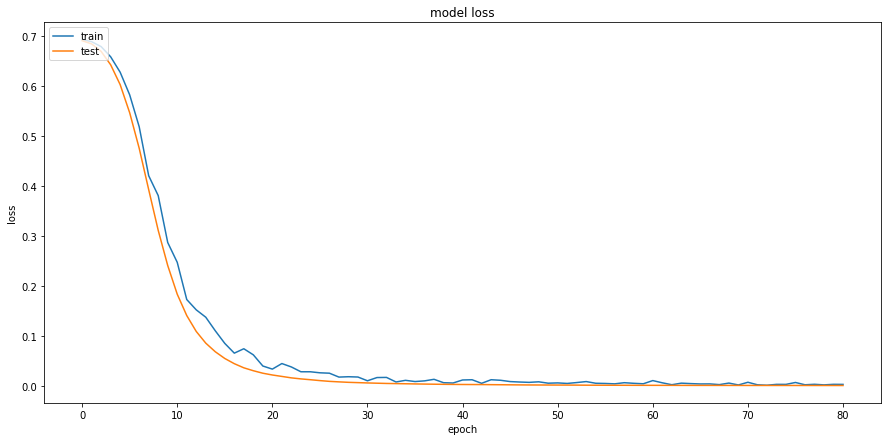

In [42]:
#summmary history for loss 
plt.figure(figsize=(15,7)) 
plt.plot(model_training.history['loss']) 
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show() 